In [2]:
import pandas as pd 
import numpy as np
import os
from ydata_profiling import ProfileReport
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, matthews_corrcoef
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Wczytanie danych 

In [ ]:
output_directory = 'D:/Informatyka i ekonometria/praca magisterska/expresso_churn/output/'
path = 'D:/Informatyka i ekonometria/praca magisterska/expresso_churn/input/'
os.chdir(path)

df = pd.read_csv('Train.csv')

In [ ]:
df.shape

In [ ]:
df.info()

In [5]:
df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [6]:
df

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0


In [7]:
df['CHURN'].sum()

403986

# Przegląd danych

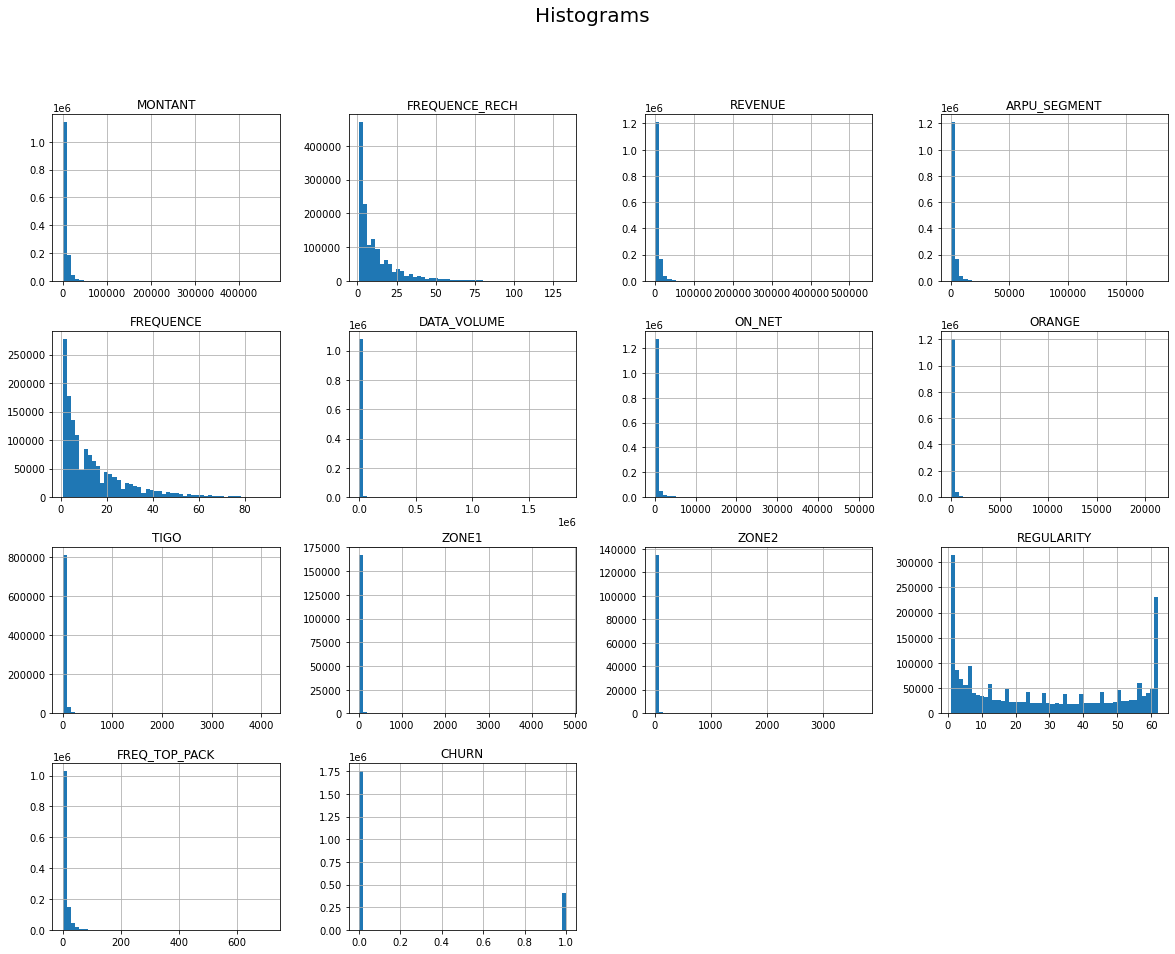

In [10]:
df.hist(bins=50, figsize=(20, 15))
plt.gcf().suptitle("Histograms", fontsize=20)
plt.show()

In [ ]:
numeric_variables = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
                     'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
                     'ZONE1', 'ZONE2', 'REGULARITY', 'FREQ_TOP_PACK']

categorical_variables = ['REGION', 'TOP_PACK', 'TENURE', 'MRG']

In [ ]:
binary_category_labels = ['Nie', 'Tak'] 

for col in numeric_variables:
    
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # usunięcie wartości odstających na potrzeby wizualizacji
    df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df_cleaned[df_cleaned['CHURN']==0][col],bins = 15, color='khaki', label='Migracja: Nie')
    sns.histplot(df_cleaned[df_cleaned['CHURN']==1][col],bins = 15, color='forestgreen', label='Migracja: Tak')
    plt.ylabel('Częśtość')
    plt.legend()
    plt.title('  Rozkład zmiennej ' + col + ' vs migracja')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='CHURN', y=col, data=df, palette=['khaki', 'forestgreen'], showfliers = False)
    plt.xticks(ticks=[0, 1], labels=binary_category_labels) 
    plt.title('Wykres pudełkowy zmiennej ' + col + ' vs migracja')
    plt.xlabel('Migracja')

    plt.tight_layout()
    filename = str(col+'.pdf')
    plt.savefig(output_directory + filename, format='pdf')
    plt.show()


# Uczenie tylko na części

In [10]:
df_test = df.sample(frac = 0.005, replace = False, random_state=2137)
df_orginal = df
df_validation = df[~df['user_id'].isin(df_test['user_id'])] 
df_validation.shape 
df = df_test

In [13]:
df

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0


In [ ]:
def preprocess_data(df):
    for column in df.select_dtypes(include=[np.number]).columns: #replace numeric NaN with mean
        df[column].fillna(df[column].mean(), inplace=True)

    for column in df.select_dtypes(include=["object"]).columns: #replace categories with most popular values 
        df[column].fillna(df[column].mode().iloc[0], inplace=True)

    # Check duplicates
    df = df.drop_duplicates()
    
    # Drop the 'user_id' column, if it exists
    df = df.drop(['user_id'], axis=1, errors='ignore')

    #Label encoding
    #le = LabelEncoder()
    #df.MRG = le.fit_transform(df.MRG)
    #df.TENURE = le.fit_transform(df.TENURE)
    #df.REGION = le.fit_transform(df.REGION)
    #df.TOP_PACK = le.fit_transform(df.TOP_PACK)
    
    
    return df

df = preprocess_data(df)

In [ ]:
df

In [ ]:
dummy_df = pd.get_dummies(df, columns=categorical_variables, drop_first = True)
dummy_names = list(dummy_df.columns)
dummy_names.remove('CHURN')

In [ ]:
df = dummy_df

In [ ]:
def replace_outliers_with_third_quartile(column):
    q3 = column.quantile(0.75)
    iqr = q3 - column.quantile(0.25)
    upper_bound = q3 + 1.5 * iqr
    return column.apply(lambda x: q3 if x > upper_bound else x)

for col in numeric_variables:
    df[col] = replace_outliers_with_third_quartile(df[col])
    
def replace_outliers_with_first_quartile(column):
    q1 = column.quantile(0.25)
    iqr = column.quantile(0.75) - q1
    lower_bound = q1 - 1.5 * iqr
    return column.apply(lambda x: q1 if x < lower_bound else x)

for col in numeric_variables:
    df[col] = replace_outliers_with_first_quartile(df[col])


In [ ]:
duplicated_columns = df.columns[df.columns.duplicated()]
duplicated_columns

In [ ]:
y = df['CHURN']
X = df.drop(['CHURN'], axis=1, errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2137)

In [ ]:
X_train

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, KBinsDiscretizer

def apply_all_transformations(X_train, X_test, X_train_dummies, X_test_dummies):
    '''
    input df: X_train, X_test
    making transformation: standarization, scaling, log transformation etc. 
    return transformed train and test set
    '''

    # Min-Max Scaling
   # min_max_scaler = MinMaxScaler()
   # X_train_scaled = min_max_scaler.fit_transform(X_train)
   # X_test_scaled = min_max_scaler.transform(X_test)

    # Log Transformation
    X_train_log = np.log1p(X_train)
    X_test_log = np.log1p(X_test)

    # sqrt Transformation
    X_train_sqrt = np.sqrt(X_train)
    X_test_sqrt = np.sqrt(X_test)
    
    # pow Transformation
    X_train_pow = np.power(X_train,2)
    X_test_pow = np.power(X_test, 2)
    
    
    
    # Power Transformation (using Yeo-Johnson to handle non-positive data)
    power_transformer = PowerTransformer(method='yeo-johnson')
    X_train_power = power_transformer.fit_transform(X_train)
    X_test_power = power_transformer.transform(X_test)

    # Concatenate all transformed features along columns with appropriate suffixes
    X_train_combined = np.hstack([
       # X_train_scaled,
        X_train_log,
        X_train_power,
        X_train_sqrt,
        X_train_pow
    ])
    X_test_combined = np.hstack([
       # X_test_scaled,
        X_test_log,
        X_test_power,
        X_test_sqrt,
        X_test_pow
    ])

    # Create column names with appropriate suffixes
    col_names = []
    for col in X_train.columns:
        col_names.extend([
          #  f"{col}_scaled",
            f"{col}_log",
            f"{col}_power",
            f'{col}_sqrt',
            f'{col}_pow_2'
        ])
    
    col_names = col_names + list(X_train_dummies.columns)
    X_train_combined_with_dummies = np.hstack([
        X_train_combined,
        X_train_dummies
    ])
    X_test_combined_with_dummies = np.hstack([
        X_test_combined,
        X_test_dummies
    ])
    # Convert back to DataFrames with new column names
    X_train_combined_df = pd.DataFrame(X_train_combined_with_dummies, columns=col_names)
    X_test_combined_df = pd.DataFrame(X_test_combined_with_dummies, columns=col_names)

    return X_train_combined_df, X_test_combined_df

In [ ]:
X_train

In [ ]:
X_train, X_test = apply_all_transformations(X_train[numeric_variables], X_test[numeric_variables], X_train[dummy_names], X_test[dummy_names])


In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test = pd.DataFrame(X_test_std, columns=X_test.columns)

In [ ]:
X_train.to_csv('X_train_after_transformations.csv', index = False) 
X_test.to_csv('X_test_after_transformations.csv', index = False) 
y_train.to_csv('y_train.csv', index = False)
y_test.to_csv('y_test.csv', index = False)

In [25]:
X

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,...,"TOP_PACK_YMGX 100=1 hour FNF, 24H/1 month",TOP_PACK_Yewouleen_PKG,TOP_PACK_pilot_offer7,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
1623724,4100.000000,12.000000,4848.000000,1616.000000,23.000000,3179.000000,17.000000,17.000000,5.000000,7.759615,...,0,0,0,0,0,0,0,0,0,1
338882,6550.000000,17.000000,7051.000000,2350.000000,21.000000,3753.000000,268.069001,94.849803,38.000000,7.759615,...,0,0,0,0,0,0,1,0,0,0
358917,5598.469245,11.576566,5537.791894,1845.935989,13.994689,1025.000000,268.069001,82.000000,24.389539,7.759615,...,0,0,0,0,0,0,0,0,0,1
226288,250.000000,2.000000,250.000000,83.000000,1.000000,1.000000,1.000000,94.849803,24.389539,7.759615,...,0,0,0,0,0,0,0,0,0,1
189263,5598.469245,11.576566,5537.791894,1845.935989,13.994689,0.000000,8.000000,94.849803,24.389539,7.759615,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788496,5598.469245,11.576566,5537.791894,1845.935989,13.994689,3367.794596,1.000000,94.849803,24.389539,7.759615,...,0,0,0,0,0,0,0,0,0,1
678760,10900.000000,21.000000,10705.000000,3568.000000,22.000000,0.000000,101.000000,197.000000,24.389539,7.759615,...,0,0,0,0,0,0,0,0,0,1
1182641,5598.469245,11.576566,5537.791894,1845.935989,13.994689,3367.794596,268.069001,94.849803,24.389539,7.759615,...,0,0,0,0,0,0,0,0,0,1
875466,1400.000000,11.000000,1549.000000,516.000000,14.000000,593.000000,268.069001,1.000000,24.389539,7.759615,...,0,0,0,0,0,0,0,0,0,1


In [26]:
X_train

,MONTANT_log,MONTANT_power,MONTANT_sqrt,MONTANT_pow_2,FREQUENCE_RECH_log,FREQUENCE_RECH_power,FREQUENCE_RECH_sqrt,FREQUENCE_RECH_pow_2,REVENUE_log,REVENUE_power,...,"TOP_PACK_YMGX 100=1 hour FNF, 24H/1 month",TOP_PACK_Yewouleen_PKG,TOP_PACK_pilot_offer7,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,0.582871,0.603953,0.541787,0.546574,0.592680,0.607415,0.776348,0.624131,0.543749,8.881784e-16,...,-0.015237,-0.018663,0.0,-0.034088,-0.061056,-0.081607,-0.113194,-0.142722,-0.077165,0.231148
1,-1.171126,-2.097227,-1.918035,-1.948522,-1.715554,-1.067277,-1.847045,-2.274812,0.543749,8.881784e-16,...,-0.015237,-0.018663,0.0,-0.034088,-0.061056,-0.081607,-0.113194,-0.142722,-0.077165,0.231148
2,-1.171126,-1.501566,-0.879880,-0.896464,-1.715554,0.607415,-0.495307,-0.997698,0.568528,8.881784e-16,...,-0.015237,-0.018663,0.0,-0.034088,-0.061056,-0.081607,-0.113194,-0.142722,-0.077165,0.231148
3,-1.690865,-1.501566,-1.455061,-1.476312,-2.297194,0.607415,0.776348,0.624131,0.543749,8.881784e-16,...,-0.015237,-0.018663,0.0,-0.034088,-0.061056,-0.081607,-0.113194,-0.142722,-0.077165,0.231148
4,0.582871,0.603953,0.541787,0.546574,0.592680,0.607415,0.776348,0.624131,0.543749,8.881784e-16,...,-0.015237,-0.018663,0.0,-0.034088,-0.061056,-0.081607,-0.113194,-0.142722,-0.077165,0.231148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611,-1.074119,-1.078938,-0.871620,-0.886418,-0.721233,-0.026188,0.776348,-1.971057,0.543749,8.881784e-16,...,-0.015237,-0.018663,0.0,-0.034088,-0.061056,-0.081607,-0.113194,-0.142722,-0.077165,0.231148
8612,-1.534062,-1.501566,-1.014788,-1.033302,-0.982774,0.607415,-0.701708,-1.971057,0.241404,8.881784e-16,...,-0.015237,-0.018663,0.0,-0.034088,-0.061056,-0.081607,-0.113194,-0.142722,-0.077165,0.231148
8613,-0.692680,-0.751123,-0.554360,-0.566201,-0.721233,-2.019604,0.638575,-0.413241,-0.005135,8.881784e-16,...,-0.015237,-0.018663,0.0,-0.034088,-0.061056,-0.081607,-0.113194,-0.142722,-0.077165,0.231148
8614,0.404691,-0.060650,0.403554,0.406264,-0.500104,0.607415,-1.847045,-2.274812,0.543749,8.881784e-16,...,-0.015237,-0.018663,0.0,-0.034088,-0.061056,-0.081607,-0.113194,-0.142722,-0.077165,0.231148


## modelowanie

In [27]:
lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(X_train, y_train)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

print("AUC with Logistic Regression:", roc_auc_score(y_test, y_prob_lr))

AUC with Logistic Regression: 0.9094696420808578


In [28]:
X_train

,MONTANT_log,MONTANT_power,MONTANT_sqrt,MONTANT_pow_2,FREQUENCE_RECH_log,FREQUENCE_RECH_power,FREQUENCE_RECH_sqrt,FREQUENCE_RECH_pow_2,REVENUE_log,REVENUE_power,...,"TOP_PACK_YMGX 100=1 hour FNF, 24H/1 month",TOP_PACK_Yewouleen_PKG,TOP_PACK_pilot_offer7,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,0.582871,0.603953,0.541787,0.546574,0.592680,0.607415,0.776348,0.624131,0.543749,8.881784e-16,...,-0.015237,-0.018663,0.0,-0.034088,-0.061056,-0.081607,-0.113194,-0.142722,-0.077165,0.231148
1,-1.171126,-2.097227,-1.918035,-1.948522,-1.715554,-1.067277,-1.847045,-2.274812,0.543749,8.881784e-16,...,-0.015237,-0.018663,0.0,-0.034088,-0.061056,-0.081607,-0.113194,-0.142722,-0.077165,0.231148
2,-1.171126,-1.501566,-0.879880,-0.896464,-1.715554,0.607415,-0.495307,-0.997698,0.568528,8.881784e-16,...,-0.015237,-0.018663,0.0,-0.034088,-0.061056,-0.081607,-0.113194,-0.142722,-0.077165,0.231148
3,-1.690865,-1.501566,-1.455061,-1.476312,-2.297194,0.607415,0.776348,0.624131,0.543749,8.881784e-16,...,-0.015237,-0.018663,0.0,-0.034088,-0.061056,-0.081607,-0.113194,-0.142722,-0.077165,0.231148
4,0.582871,0.603953,0.541787,0.546574,0.592680,0.607415,0.776348,0.624131,0.543749,8.881784e-16,...,-0.015237,-0.018663,0.0,-0.034088,-0.061056,-0.081607,-0.113194,-0.142722,-0.077165,0.231148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611,-1.074119,-1.078938,-0.871620,-0.886418,-0.721233,-0.026188,0.776348,-1.971057,0.543749,8.881784e-16,...,-0.015237,-0.018663,0.0,-0.034088,-0.061056,-0.081607,-0.113194,-0.142722,-0.077165,0.231148
8612,-1.534062,-1.501566,-1.014788,-1.033302,-0.982774,0.607415,-0.701708,-1.971057,0.241404,8.881784e-16,...,-0.015237,-0.018663,0.0,-0.034088,-0.061056,-0.081607,-0.113194,-0.142722,-0.077165,0.231148
8613,-0.692680,-0.751123,-0.554360,-0.566201,-0.721233,-2.019604,0.638575,-0.413241,-0.005135,8.881784e-16,...,-0.015237,-0.018663,0.0,-0.034088,-0.061056,-0.081607,-0.113194,-0.142722,-0.077165,0.231148
8614,0.404691,-0.060650,0.403554,0.406264,-0.500104,0.607415,-1.847045,-2.274812,0.543749,8.881784e-16,...,-0.015237,-0.018663,0.0,-0.034088,-0.061056,-0.081607,-0.113194,-0.142722,-0.077165,0.231148


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF             = pd.DataFrame()
VIF['feature']  = X_train.columns
VIF['VIF']      = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF


D:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
D:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [ ]:
mask = VIF['VIF'] > 10

features_with_mullticolinearity = list(VIF['feature'][mask])


In [ ]:
features_with_mullticolinearity

In [ ]:
features_lr = list(np.setdiff1d(list(X_train.columns),features_with_mullticolinearity))

In [ ]:
features_lr.append('REGULARITY')

In [ ]:
features_lr.to_csv('features_lr.csv', index = False)

In [34]:
X_train_lr = X_train[features_lr]
X_test_lr = X_test[features_lr]

In [35]:
lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(X_train_lr, y_train)
y_prob_lr = lr_model.predict_proba(X_test_lr)[:, 1]

print("AUC with Logistic Regression:", roc_auc_score(y_test, y_prob_lr))

AUC with Logistic Regression: 0.9037249339560598


In [36]:
y_prob_lr_train = lr_model.predict_proba(X_train_lr)[:, 1]

print("AUC with Logistic Regression:", roc_auc_score(y_train, y_prob_lr_train))

AUC with Logistic Regression: 0.9115030345972869


In [37]:
coefficients = lr_model.coef_

# Print the coefficients
print("Coefficients:", coefficients)

Coefficients: [[ 0.00000000e+00  0.00000000e+00 -4.94365903e-14  1.23591476e-14
  -4.09119062e-01 -2.85051319e-01 -4.66166896e-01 -4.32211896e-01
  -1.25111280e-01 -2.52918630e-01 -4.09056857e-01 -4.11014871e-01
  -6.17784950e-01 -2.26637468e-01 -3.28218222e-01 -7.36462291e-01
  -1.62279317e-01 -1.54489345e-15 -3.86223362e-16  1.01658643e-01
   5.12048281e-03  2.81498186e-02  1.54489345e-15  0.00000000e+00
   2.85150961e-02 -2.56523148e-02 -1.03278312e-01 -3.79239394e-02
   3.42927787e-02 -1.05845596e-02  0.00000000e+00 -1.17977377e-02
  -6.71576236e-02 -1.24287468e-01 -8.78603469e-02  3.27554189e-02
  -6.87960282e-02  1.97434318e-02  8.34464572e-02 -3.00638919e-01
   3.03721266e-02 -8.47823310e-02 -1.75719448e-02  7.93853132e-02
   0.00000000e+00 -4.77841322e-02 -2.21125214e-02 -5.18636445e-02
  -4.01710356e-02  1.68507169e-02 -8.82749839e-02 -1.52945893e-02
  -3.78814860e-02 -5.30061787e-02 -1.21776436e-01  5.13164283e-02
  -7.89716773e-02 -1.81160868e-01 -6.61143034e-02  2.20793097e

In [38]:
clf = DecisionTreeClassifier()


In [39]:
# Example hyperparameter grid for Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
best_params = {'max_depth': [5], 'min_samples_leaf': [2], 'min_samples_split': [2]}

In [40]:
# Grid Search
grid_search = GridSearchCV(clf, best_params, cv=5)
grid_search.fit(X_train, y_train)

# Random Search (alternative to Grid Search)
# from scipy.stats import randint
# param_dist = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': randint(1, 21),
#     'min_samples_split': randint(2, 11),
#     'min_samples_leaf': randint(1, 5)
# }
# random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=5)
# random_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5], 'min_samples_leaf': [2],
                         'min_samples_split': [2]})

In [41]:
best_params = grid_search.best_params_
# For Random Search, use: best_params = random_search.best_params_

best_model = grid_search.best_estimator_
# For Random Search, use: best_model = random_search.best_estimator_
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score: 0.8601447187162089


In [42]:
best_params = {'max_depth': [5], 'min_samples_leaf': [2], 'min_samples_split': [2]}

In [43]:
dc_model = DecisionTreeClassifier(max_depth = best_params['max_depth'][0],
                                 min_samples_leaf = best_params['min_samples_leaf'][0],
                                 min_samples_split  = best_params['min_samples_split'][0])
dc_model.fit(X_train,y_train)

y_prob_dc = dc_model.predict_proba(X_test)[:,1]
print("AUC with Decision Tree Model:",roc_auc_score(y_test,y_prob_dc))

AUC with Decision Tree Model: 0.8925051274620176


In [44]:
y_prob_dc_train = dc_model.predict_proba(X_train)[:,1]
print("AUC with train Decision Tree Model:",roc_auc_score(y_train,y_prob_dc_train))

AUC with train Decision Tree Model: 0.9008194325124094


In [58]:
clf = RandomForestClassifier(random_state=42)


In [64]:
Best_parameters: {'criterion': ['gini'], 'max_features': ['log2'], 'min_samples_leaf': [1], 'min_samples_split': [10], 'n_estimators': [300]}

# Example hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees in the forest
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']    # Number of features to consider at each split
}


In [65]:
# Grid Search
grid_search = GridSearchCV(clf, Best_parameters, cv=5)
grid_search.fit(X_train, y_train)

# Random Search (alternative to Grid Search)
# from scipy.stats import randint
# param_dist = {
#     'n_estimators': randint(100, 500),
#     'criterion': ['gini', 'entropy'],
#     'max_depth': randint(1, 21),
#     'min_samples_split': randint(2, 11),
#     'min_samples_leaf': randint(1, 5),
#     'max_features': ['auto', 'sqrt', 'log2']
# }
# random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=5)
# random_search.fit(X_train, y_train)


NameError: name 'Best_parameters' is not defined

In [55]:
best_params = grid_search.best_params_
# For Random Search, use: best_params = random_search.best_params_

best_model = grid_search.best_estimator_
# For Random Search, use: best_model = random_search.best_estimator_


In [51]:
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score: 0.8651353396722115


SyntaxError: invalid syntax (Temp/ipykernel_18396/3974562531.py, line 1)

In [66]:
rfr_model = RandomForestClassifier(
    n_estimators = 300,
    max_depth = None,
    min_samples_split = 10,
    min_samples_leaf = 1,
    criterion = 'gini',
    max_features = 'log2'
)

rfr_model.fit(X_train,y_train)

y_prob_rfr = rfr_model.predict_proba(X_test)[:,1]
print("AUC by RandomForest:",roc_auc_score(y_test,y_prob_rfr))

AUC by RandomForest: 0.891690724867076


In [67]:

y_prob_rfr_train = rfr_model.predict_proba(X_train)[:,1]
print("AUC by  train RandomForest:",roc_auc_score(y_train,y_prob_rfr_train))

AUC by  train RandomForest: 0.9571131950059519


In [68]:
import xgboost as xgb

XGB_model = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds (trees)
    max_depth=3,        # Maximum depth of each tree
    learning_rate=0.1,  # Step size shrinkage during tree building
    random_state=42     # For reproducibility
)

XGB_model.fit(X_train, y_train)

y_prob_XGB = XGB_model.predict_proba(X_test)[:,1]
print("AUC by XGBoost:",roc_auc_score(y_test,y_prob_XGB))

AUC by XGBoost: 0.9110009140258379


In [69]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_sample(X_train, y_train)

In [70]:
lr_model_res = LogisticRegression(max_iter = 1000)
lr_model_res.fit(X_res, y_res)
y_prob_lr_res = lr_model_res.predict_proba(X_test)[:, 1]

print("AUC with Logistic Regression:", roc_auc_score(y_test, y_prob_lr_res))

AUC with Logistic Regression: 0.9083835397322573


In [71]:
dc_model_res = DecisionTreeClassifier()
dc_model_res.fit(X_res,y_res)

y_prob_dc_res = dc_model_res.predict_proba(X_test)[:,1]
print("AUC with Decision Tree Model:",roc_auc_score(y_test,y_prob_dc_res))

AUC with Decision Tree Model: 0.7968835341589291


In [72]:
rfr_model_res = RandomForestClassifier()
rfr_model_res.fit(X_res,y_res)

y_prob_rfr_res = rfr_model_res.predict_proba(X_test)[:,1]
print("AUC by RandomForest:",roc_auc_score(y_test,y_prob_rfr_res))

AUC by RandomForest: 0.8873226288274831


In [73]:
import xgboost as xgb

XGB_model_res = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds (trees)
    max_depth=3,        # Maximum depth of each tree
    learning_rate=0.1,  # Step size shrinkage during tree building
    random_state=42     # For reproducibility
)

XGB_model_res.fit(X_res, y_res)

y_prob_XGB_res = XGB_model_res.predict_proba(X_test)[:,1]
print("AUC by XGBoost:",roc_auc_score(y_test,y_prob_XGB_res))

AUC by XGBoost: 0.9129662089106374


In [74]:
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')

lasso_model.fit(X_train, y_train)

y_prob_lasso = lasso_model.predict_proba(X_test)[:,1]
print("AUC by LASSO:",roc_auc_score(y_test,y_prob_lasso))

AUC by LASSO: 0.9110266906691338


In [75]:
lasso_model_res = LogisticRegression(penalty='l1', solver='liblinear')

lasso_model_res.fit(X_res, y_res)

y_prob_lasso_res = lasso_model_res.predict_proba(X_test)[:,1]
print("AUC by LASSO SMOTE:",roc_auc_score(y_test,y_prob_lasso_res))

AUC by LASSO SMOTE: 0.9098785850434162


In [25]:
X_train = pd.read_csv('X_train_after_transformations.csv')
X_test = pd.read_csv('X_test_after_transformations.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [26]:
df = X_train
df['CHURN']=  y_train

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.995,random_state=2137)

In [36]:
X_train

,MONTANT_log,MONTANT_power,MONTANT_sqrt,MONTANT_pow_2,FREQUENCE_RECH_log,FREQUENCE_RECH_power,FREQUENCE_RECH_sqrt,FREQUENCE_RECH_pow_2,REVENUE_log,REVENUE_power,...,TOP_PACK_pilot_offer5,TOP_PACK_pilot_offer6,TOP_PACK_pilot_offer7,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
755637,-1.536829,-1.500933,-1.161382,-1.181116,-0.992684,0.603681,-1.811698,-0.731234,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
1852698,0.578410,0.604361,0.540071,0.544933,0.591166,0.603681,0.787729,0.627623,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,11.969814,-0.110316,-0.14642,-0.076924,-4.299065
1955116,0.578410,0.604361,-5.657051,-5.169190,-2.315440,0.603681,0.787729,0.627623,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
2611218,0.109798,-0.253027,0.164195,0.163249,0.007942,0.877273,0.787729,-2.828849,-2.835094,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
2396248,0.578410,0.604361,0.540071,0.544933,0.591166,0.603681,0.787729,0.627623,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519120,0.578410,0.604361,0.540071,0.544933,0.591166,0.603681,0.787729,0.627623,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
2028492,0.578410,0.604361,0.540071,0.544933,0.591166,0.603681,0.787729,0.627623,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
6829,0.819319,0.767845,0.737498,0.745389,0.493673,0.603681,-0.196292,0.268747,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
2176830,-1.226838,-2.098104,-0.582812,-0.594474,-1.392117,0.457865,0.787729,0.248307,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,15.223147,-0.083543,-0.110316,-0.14642,-0.076924,-4.299065


In [38]:
train_x = X_train.values
test_x = X_test.values

In [42]:
list(X_train.columns)

['MONTANT_log',
 'MONTANT_power',
 'MONTANT_sqrt',
 'MONTANT_pow_2',
 'FREQUENCE_RECH_log',
 'FREQUENCE_RECH_power',
 'FREQUENCE_RECH_sqrt',
 'FREQUENCE_RECH_pow_2',
 'REVENUE_log',
 'REVENUE_power',
 'REVENUE_sqrt',
 'REVENUE_pow_2',
 'ARPU_SEGMENT_log',
 'ARPU_SEGMENT_power',
 'ARPU_SEGMENT_sqrt',
 'ARPU_SEGMENT_pow_2',
 'FREQUENCE_log',
 'FREQUENCE_power',
 'FREQUENCE_sqrt',
 'FREQUENCE_pow_2',
 'DATA_VOLUME_log',
 'DATA_VOLUME_power',
 'DATA_VOLUME_sqrt',
 'DATA_VOLUME_pow_2',
 'ON_NET_log',
 'ON_NET_power',
 'ON_NET_sqrt',
 'ON_NET_pow_2',
 'ORANGE_log',
 'ORANGE_power',
 'ORANGE_sqrt',
 'ORANGE_pow_2',
 'TIGO_log',
 'TIGO_power',
 'TIGO_sqrt',
 'TIGO_pow_2',
 'ZONE1_log',
 'ZONE1_power',
 'ZONE1_sqrt',
 'ZONE1_pow_2',
 'ZONE2_log',
 'ZONE2_power',
 'ZONE2_sqrt',
 'ZONE2_pow_2',
 'REGULARITY_log',
 'REGULARITY_power',
 'REGULARITY_sqrt',
 'REGULARITY_pow_2',
 'FREQ_TOP_PACK_log',
 'FREQ_TOP_PACK_power',
 'FREQ_TOP_PACK_sqrt',
 'FREQ_TOP_PACK_pow_2',
 'MONTANT',
 'FREQUENCE_RECH',


In [39]:
svm_model = SVC(kernel='linear', probability = True)

svm_model.fit(train_x, y_train)

y_prob_svm = svm_model.predict_proba(test_x)[:,1]

# Calculate accuracy
print("AUC by SVM:",roc_auc_score(y_test,y_prob_svm))

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC by SVM: 0.8977517045881895


In [34]:
svm_model

SVC(kernel='linear', probability=True)

In [29]:
X_res = pd.read_csv('X_res.csv')
y_res = pd.read_csv('y_res.csv')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.995,random_state=2137)

,CHURN
0,0
1,1
2,0
3,0
4,0
...,...
2799365,1
2799366,1
2799367,1
2799368,1


In [21]:
svm_model_res = SVC(kernel='linear', probability = True)

svm_model_res.fit(X_train, y_train)


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- CHURN


In [23]:
y_prob_svm_res = svm_model_res.predict_proba(X_test)[:,1]

# Calculate accuracy
print("AUC by SVM:",roc_auc_score(y_test,y_prob_svm_res))

AUC by SVM: 0.8977517328701285


In [40]:
import joblib

joblib.dump(svm_model, 'svm_model.pkl')
#joblib.dump(svm_model_res, 'svm_model_res.pkl')

['svm_model.pkl']

In [33]:
X_train

,MONTANT_log,MONTANT_power,MONTANT_sqrt,MONTANT_pow_2,FREQUENCE_RECH_log,FREQUENCE_RECH_power,FREQUENCE_RECH_sqrt,FREQUENCE_RECH_pow_2,REVENUE_log,REVENUE_power,...,TOP_PACK_pilot_offer5,TOP_PACK_pilot_offer6,TOP_PACK_pilot_offer7,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
755637,-1.536829,-1.500933,-1.161382,-1.181116,-0.992684,0.603681,-1.811698,-0.731234,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
1852698,0.578410,0.604361,0.540071,0.544933,0.591166,0.603681,0.787729,0.627623,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,11.969814,-0.110316,-0.14642,-0.076924,-4.299065
1955116,0.578410,0.604361,-5.657051,-5.169190,-2.315440,0.603681,0.787729,0.627623,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
2611218,0.109798,-0.253027,0.164195,0.163249,0.007942,0.877273,0.787729,-2.828849,-2.835094,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
2396248,0.578410,0.604361,0.540071,0.544933,0.591166,0.603681,0.787729,0.627623,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519120,0.578410,0.604361,0.540071,0.544933,0.591166,0.603681,0.787729,0.627623,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
2028492,0.578410,0.604361,0.540071,0.544933,0.591166,0.603681,0.787729,0.627623,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
6829,0.819319,0.767845,0.737498,0.745389,0.493673,0.603681,-0.196292,0.268747,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,-0.065689,-0.083543,-0.110316,-0.14642,-0.076924,0.232609
2176830,-1.226838,-2.098104,-0.582812,-0.594474,-1.392117,0.457865,0.787729,0.248307,0.539217,-6.661338e-15,...,-0.000762,-0.001319,-0.000762,-0.02918,15.223147,-0.083543,-0.110316,-0.14642,-0.076924,-4.299065


# VALIDATION

In [76]:
def calculate_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

In [77]:
from sklearn.metrics import matthews_corrcoef
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'specificity': make_scorer(calculate_specificity, needs_threshold=True),
    'f1': make_scorer(f1_score),
    'auc': make_scorer(roc_auc_score, max_fpr=0.001, needs_proba=True),
    'MCC': make_scorer(matthews_corrcoef)
}

In [78]:
y_prob_XGB_res = XGB_model_res.predict_proba(X_test)[:, 1]
print("AUC by XGBoost:",roc_auc_score(y_test,y_prob_XGB_res))

AUC by XGBoost: 0.9129662089106374


In [79]:
# Define the xgboost model
model = XGBClassifier()

# Define the grid search parameters
# params = {
#     'learning_rate': [0.01, 0.1, 0.5],
#     'max_depth': [3, 5],
#     'gamma': [0.01, 0.1, 0.5]
# }

params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.0, 0.1, 0.2],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


best_params = {'colsample_bytree': [1.0], 'gamma': [0.0], 'learning_rate': [0.2], 'max_depth': [3], 'min_child_weight': [5]}

In [80]:
#grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='roc_auc', verbose=1)
#grid_search.fit(X_train, y_train)
grid_search = GridSearchCV(estimator=model, param_grid=best_params, cv=5, scoring='roc_auc', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5}
Best score: 0.9103674763620271


In [81]:
import xgboost as xgb

XGB_model = xgb.XGBClassifier(
    colsample_bytree = best_params['colsample_bytree'][0],
    eta = best_params['learning_rate'][0],
    gamma = best_params['gamma'][0],
    max_depth = best_params['max_depth'][0],
    min_child_weight = best_params['min_child_weight'][0]
)

XGB_model.fit(X_train, y_train)

y_prob_XGB = XGB_model.predict_proba(X_test)[:,1]
print("AUC by XGBoost:",roc_auc_score(y_test,y_prob_XGB))

AUC by XGBoost: 0.9101718814441608


In [82]:
y_prob_XGB_train = XGB_model.predict_proba(X_train)[:,1]
print("AUC by XGBoost train:",roc_auc_score(y_train,y_prob_XGB_train))

AUC by XGBoost train: 0.9250563349982032


In [83]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

def find_best_threshold(y_true, y_prob):
    fpr, tpr, thresholds_roc = roc_curve(y_true, y_prob)
    precision, recall, thresholds_pr = precision_recall_curve(y_true, y_prob)

    # ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label='ROC curve (area = %0.2f)' % roc_auc_score(y_true, y_prob))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # PR curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='r', label='Precision-Recall curve (area = %0.2f)' % auc(recall, precision))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

    # Find the best threshold based on the PR curve
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold_pr = thresholds_pr[np.argmax(f1_scores)]

    return best_threshold_pr

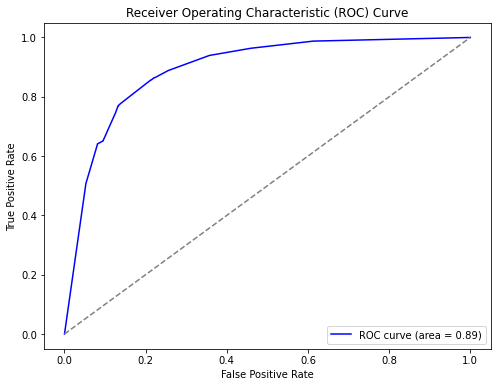

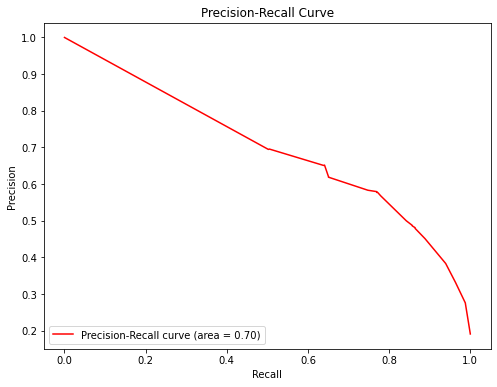

In [84]:
best_threshold = find_best_threshold(y_test, y_prob_dc)

In [85]:
def calculate_metrics(true_labels, predicted_probs, model_label, best_threshold):
    # Convert probabilities to class labels (0 or 1) based on a threshold of 0.5 
    predicted_labels = [1 if prob >= best_threshold else 0 for prob in predicted_probs]
    
    # Accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)
    
    # Precision
    precision = precision_score(true_labels, predicted_labels)
    
    # Recall (Sensitivity)
    recall = recall_score(true_labels, predicted_labels)
    
    # Confusion matrix to calculate True Negatives for Specificity
    tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
    
    # Specificity (True Negative Rate)
    specificity = tn / (tn + fp)
    
    # F1 Score
    f1 = f1_score(true_labels, predicted_labels)
    
    # AUC
    auc = roc_auc_score(true_labels, predicted_probs)
    
    # MCC
    mcc = matthews_corrcoef(true_labels, predicted_labels)
    metrics_dict = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'specificity': specificity, 'f1': f1, 'auc': auc, 'mcc' : mcc}
    return pd.DataFrame(metrics_dict,index=[model_label])

In [86]:
models = {'lr_model': y_prob_lr,
          'dc_model': y_prob_dc,
          'rfr_model': y_prob_rfr,
          'XGB_model': y_prob_XGB,
          'lasso_model': y_prob_lasso,
        #  'svm_model': y_prob_svm,
          'lr_model_res': y_prob_lr_res,
          'dc_model_res': y_prob_dc_res,
          'rfr_model_res': y_prob_rfr_res,
          'XGB_model_res': y_prob_XGB_res,
          'lasso_model_res': y_prob_lasso_res
         # 'svm_model_res': y_prob_svm_res
         }

In [87]:
metrics_df = pd.DataFrame({'accuracy': [], 'precision': [], 'recall': [], 'specificity': [], 'f1': [], 'auc': [], 'mcc' : []})

In [88]:
for model_label, predicted_probs in models.items():
    metrics_df = pd.concat([metrics_df, calculate_metrics(y_test, predicted_probs, model_label, best_threshold)])

In [89]:
metrics_df

,accuracy,precision,recall,specificity,f1,auc,mcc
lr_model,0.836583,0.547923,0.832524,0.837543,0.660886,0.903725,0.580420
dc_model,0.849118,0.579525,0.769417,0.867968,0.661105,0.892505,0.575935
rfr_model,0.853296,0.596386,0.720874,0.884615,0.652747,0.891691,0.564851
XGB_model,0.865367,0.620079,0.764563,0.889208,0.684783,0.910172,0.605692
lasso_model,0.857939,0.600760,0.766990,0.879449,0.673774,0.911027,0.591807
lr_model_res,0.784587,0.467172,0.898058,0.757750,0.614618,0.908384,0.534932
dc_model_res,0.806407,0.496112,0.774272,0.814007,0.604739,0.796884,0.505613
rfr_model_res,0.824513,0.526899,0.808252,0.828358,0.637931,0.887323,0.549896
XGB_model_res,0.796657,0.482804,0.885922,0.775545,0.625000,0.912966,0.545088
lasso_model_res,0.785515,0.468514,0.902913,0.757750,0.616915,0.909879,0.538608


In [90]:
models_unbalanced = {'lr_model': y_prob_lr,
          'dc_model': y_prob_dc,
          'rfr_model': y_prob_rfr,
          'XGB_model': y_prob_XGB,
          'lasso_model': y_prob_lasso
         # 'svm_model': y_prob_svm
         }
models_smote = {
          'lr_model_res': y_prob_lr_res,
          'dc_model_res': y_prob_dc_res,
          'rfr_model_res': y_prob_rfr_res,
          'XGB_model_res': y_prob_XGB_res,
          'lasso_model_res': y_prob_lasso_res
       #   'svm_model_res': y_prob_svm_res
}

## Roc Cuvre


In [91]:
# Create a figure and axis to plot the ROC curve
def roc_curve_models(models, filename):
    plt.figure(figsize=(10, 8))
    plt.title('Receiver Operating Characteristic - Krzywa ROC ')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Iterate through each model's probabilities, calculate ROC curve, and plot it
    for model_name, y_prob in models.items():
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Plot the random guess line (dashed)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

    # Set axis limits and add a legend
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc='lower right')
    filename = str('roc' + filename + '.pdf')
    plt.savefig(output_directory + filename, format='pdf')

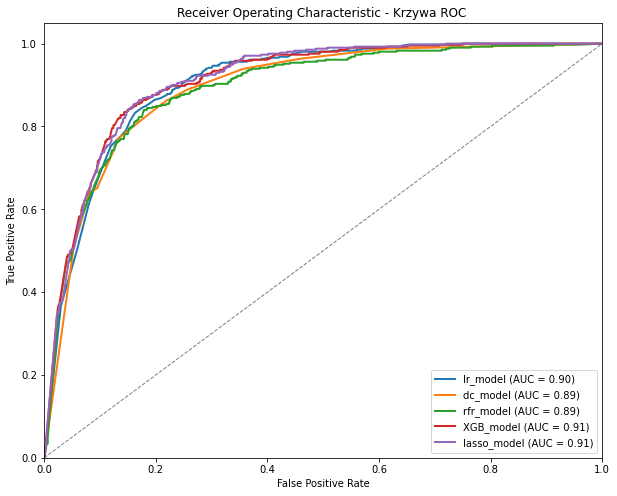

In [93]:
roc_curve_models(models_unbalanced, 'unbalenced')

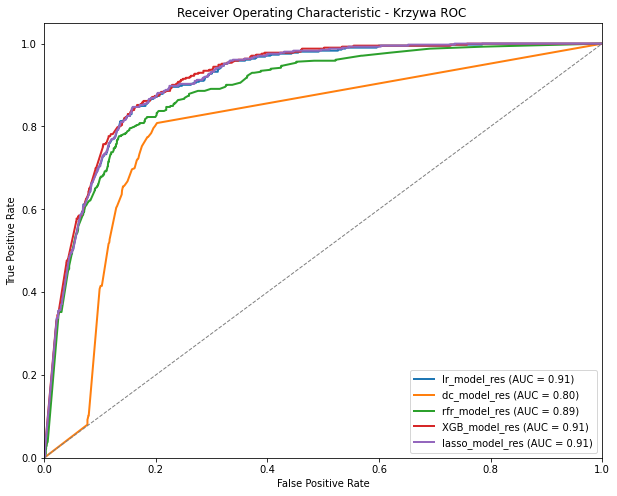

In [94]:
roc_curve_models(models_smote, 'smote')

In [95]:
models_ = {'lr_model': lr_model,
          'dc_model': dc_model,
          'rfr_model': rfr_model,
          'XGB_model': XGB_model,
          'lasso_model': lasso_model,
      #    'svm_model': svm_model,
          'lr_model_res': lr_model_res,
          'dc_model_res': dc_model_res,
          'rfr_model_res': rfr_model_res,
          'XGB_model_res': XGB_model_res,
          'lasso_model_res': lasso_model_res
       #   'svm_model_res': svm_model_res
         }

# feature importance

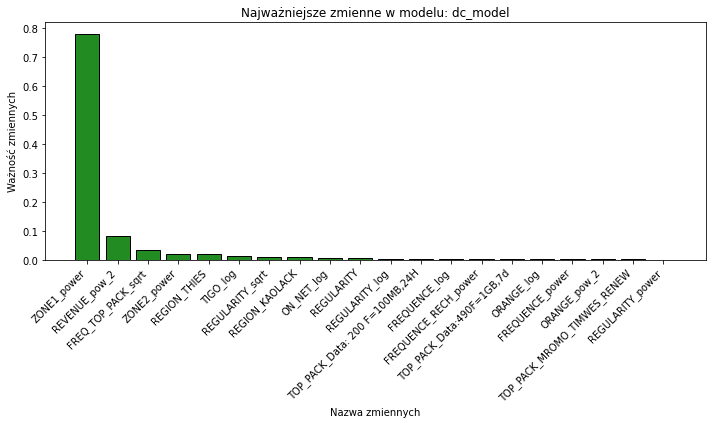

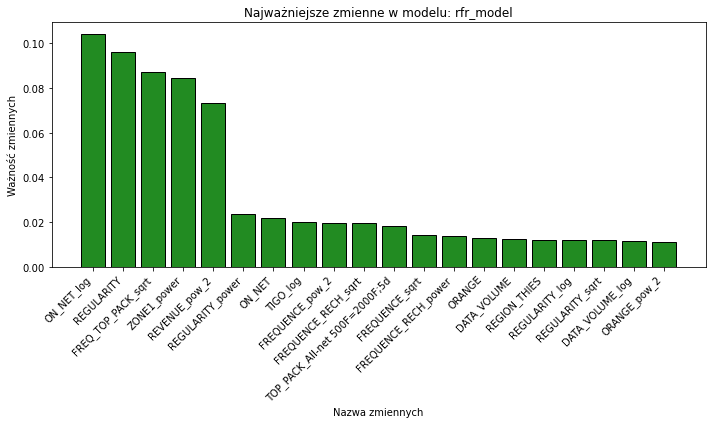

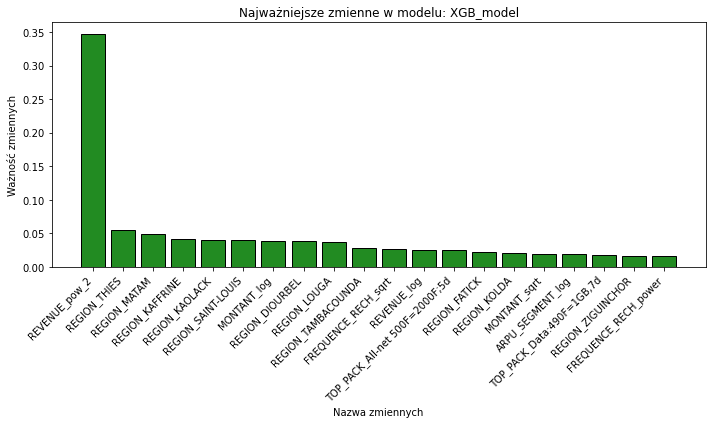

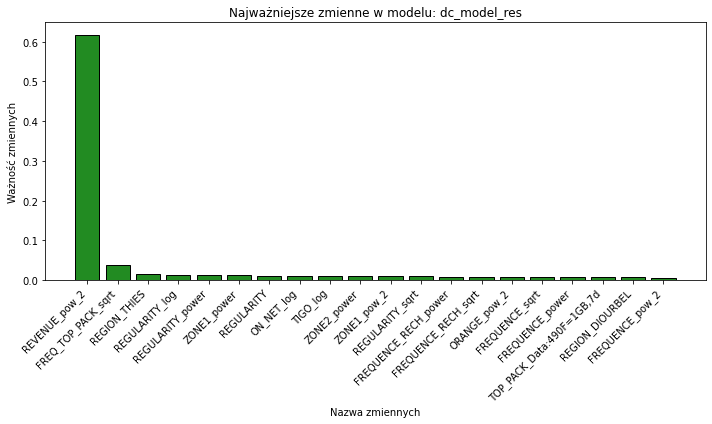

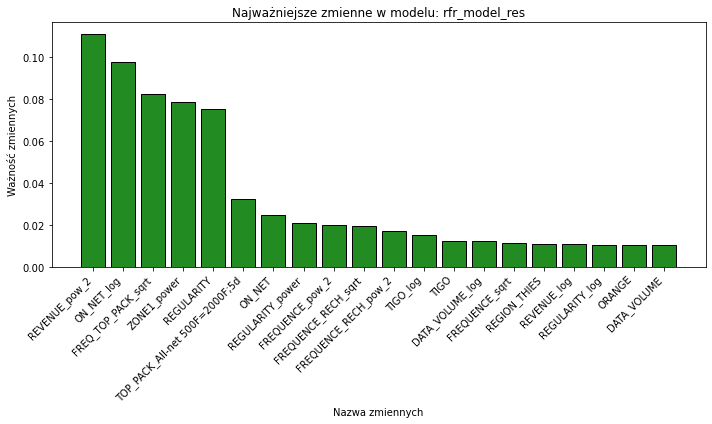

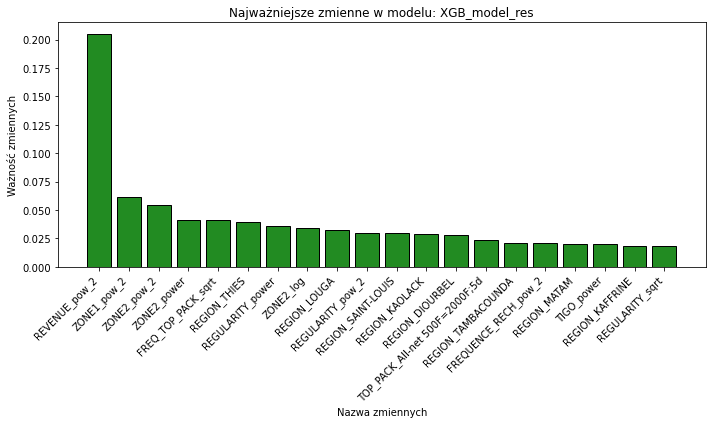

In [96]:
# Initialize a dictionary to store the top 20 feature importances and names for each model.
feature_names = list(X_train.columns)
top_20_feature_importances = {}

# Loop through each model in the 'models' dictionary.
for model_name, model in models_.items():
    # Check if the model is tree-based and has the 'feature_importances_' attribute.
    if hasattr(model, 'feature_importances_'):
        # Get the feature importances for the model.
        feature_importance = model.feature_importances_
        # Get the indices of the top 20 features sorted in descending order.
        top_20_indices = feature_importance.argsort()[::-1][:20]
        # Get the corresponding top 20 feature importances.
        top_20_importances = feature_importance[top_20_indices]
        # Get the names of the top 20 features based on their indices.
        top_20_feature_names = [feature_names[i] for i in top_20_indices]
        # Store the top 20 feature importances and names in the 'top_20_feature_importances' dictionary.
        top_20_feature_importances[model_name] = (top_20_importances, top_20_feature_names)

# Create plots for each model's top 20 feature importances.
for model_name, (importances, names) in top_20_feature_importances.items():
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importances)), importances, tick_label=names, color='forestgreen', edgecolor='black')
    plt.xlabel('Nazwa zmiennych')
    plt.ylabel('Ważność zmiennych')
    plt.title(f'Najważniejsze zmienne w modelu: {model_name}')
    plt.xticks(rotation=45, horizontalalignment='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    filename = str(model_name + '.pdf')
    plt.savefig(output_directory + filename, format = 'pdf')
    plt.show()

# shap explanation


In [ ]:
import shap
shap.initjs()

In [ ]:
X_sampled = X_train.sample(100000, random_state=10)


In [ ]:
explainer = shap.TreeExplainer(XGB_model_res)
shap_values = explainer.shap_values(X_sampled)


In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_sampled.iloc[0,:])

In [ ]:
shap.force_plot(explainer.expected_value, shap_values, X_sampled)

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_sampled, show = False)


In [ ]:
shap.summary_plot(shap_values, X_sampled, plot_type="bar")


In [ ]:
# =============================================================================
# # Get global variable importance plot
# =============================================================================
shap_values = explainer.shap_values(X_sampled)

plt_shap = shap.summary_plot(shap_values, #Use Shap values array
                             features=X_sampled, # Use training set features
                             feature_names=X_sampled.columns, #Use column names
                             show=True, #Set to false to output to folder
                             plot_size=(30,15))




In [ ]:
# compute SHAP values
explainer = shap.Explainer(XGB_model_res, X_sampled)
shap_values = explainer(X_sampled)
shap.plots.waterfall(shap_values[0])


In [97]:
import joblib


In [98]:
for key in models_.keys():
    model = models_[key]
    model_name = str(key + '.pkl')
    joblib.dump(model, model_name)

In [100]:
models_load = {'lr_model': [],
          'dc_model': [],
          'rfr_model': [],
          'XGB_model': [],
          'lasso_model': [],
      #    'svm_model': svm_model,
          'lr_model_res': [],
          'dc_model_res': [],
          'rfr_model_res': [],
          'XGB_model_res': [],
          'lasso_model_res': []
       #   'svm_model_res': svm_model_res
         }

In [104]:
for key in models_.keys():
    model = models_[key]
    model_name = str(key + '.pkl')
    models_load[key] = joblib.load(model_name)

In [122]:
y_prob_test = models_load['XGB_model'].predict_proba(X_test)[:, 1]

print("AUC test:", roc_auc_score(y_test, y_prob_test))

AUC test: 0.9157910472733433


from sklearn import svm